In this notebook I implemented A linear regression from scratch (with just using numpy and pandas) and compared
my model with the model wich have been created with Sckit-Learn
I did these :
- Implementing Gradiant Dcsent for one and multiple features from scratch
- 

I used a Housing dataset wich you can download it throgh this link :
https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


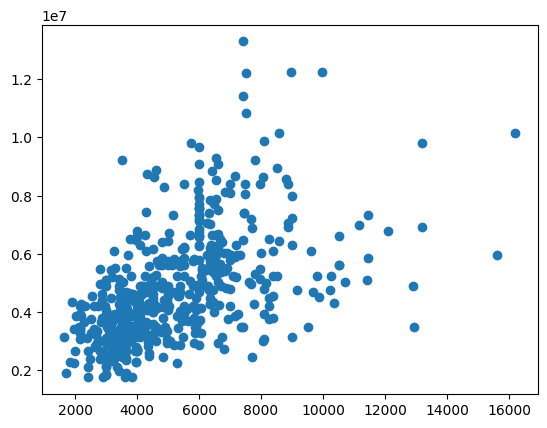

In [4]:
plt.scatter(x=df["area"], y=df["price"])

In [5]:
new_df = df[['area','bedrooms' , 'price']]
new_df
# Divide the area by 1000 and price 1000000
new_df['area'] = new_df['area'] / 1000
new_df['price'] = new_df['price'] / 1000000


C:\Users\mmahd\AppData\Local\Temp\ipykernel_9592\3472303389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['area'] = new_df['area'] / 1000
C:\Users\mmahd\AppData\Local\Temp\ipykernel_9592\3472303389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price'] = new_df['price'] / 1000000


In [6]:
# Split to Train set and test set (70/30)
train_df =  new_df.sample(frac=0.6, random_state=45)
test_df = new_df.drop(train_df.index)

In [7]:
EPOCHS_NUM = 10000
ALPHA = 0.01
m = train_df.shape[0]
w, b = 0, 0

cost_records = []
w_records = []
b_records = []

for epoch in range(EPOCHS_NUM):
    dw, db = 0, 0
    w_records.append(w)
    b_records.append(b)
    for sample in train_df.itertuples(index=False):    
        x = sample.area
        y = sample.price
        y_hat = w*x + b
        dw += x * (y_hat - y)
        db += (y_hat - y)

    # Gradient Dcsent
    dw /= m
    db /= m
    w = w - ALPHA * dw
    b = b - ALPHA * db
    J = sum(((w * sample.area + b) - sample.price) ** 2 for sample in train_df.itertuples(index=False)) / m
    J = round(float(J), 20)
    cost_records.append(J)
    if epoch % 2000 == 0:
        print("-------------------------------------------------")
        print(f"Current w and b {round(w, 5), round(b, 5)}")
        print(f'Error in epoch {epoch} = {J}')



-------------------------------------------------
Current w and b (0.26246, 0.04747)
Error in epoch 0 = 14.0836425946722
-------------------------------------------------
Current w and b (0.48398, 2.27253)
Error in epoch 2000 = 2.5614165194243474
-------------------------------------------------
Current w and b (0.46552, 2.38254)
Error in epoch 4000 = 2.559374062033106
-------------------------------------------------
Current w and b (0.46456, 2.38822)
Error in epoch 6000 = 2.5593686032895837
-------------------------------------------------
Current w and b (0.46451, 2.38852)
Error in epoch 8000 = 2.5593685887003557


In [8]:
w, b

(0.46451003917264727, 2.3885330217938603)

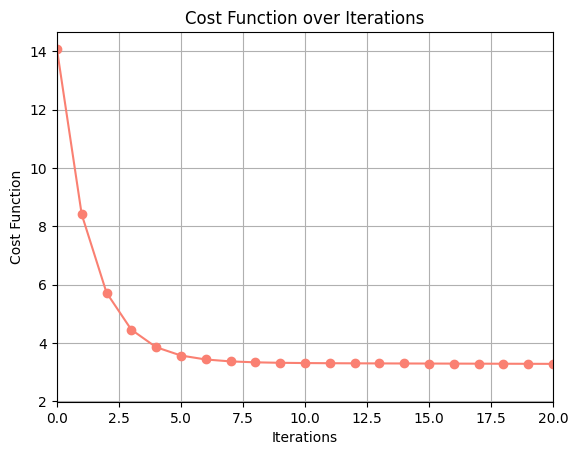

In [9]:
iterations = list(range(1, len(cost_records) + 1))
plt.plot(range(EPOCHS_NUM), cost_records,marker='o', linestyle='-', color="salmon")

plt.xlim(0, 20)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function over Iterations")
plt.grid(True)

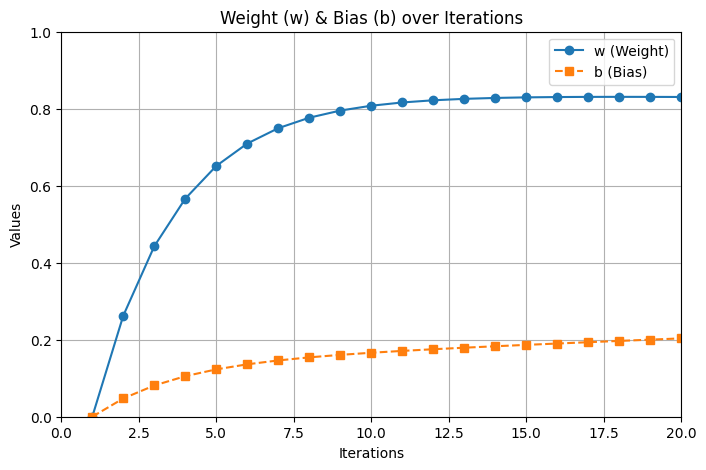

In [10]:
iterations = list(range(1, len(cost_records) + 1))

plt.figure(figsize=(8, 5))
plt.plot(iterations, w_records, marker='o', linestyle='-', label="w (Weight)")  
plt.plot(iterations, b_records, marker='s', linestyle='--', label="b (Bias)")  

plt.xlim(0, 20)
plt.ylim(0,1)
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.title("Weight (w) & Bias (b) over Iterations")
plt.legend() 
plt.grid(True) 

plt.show()

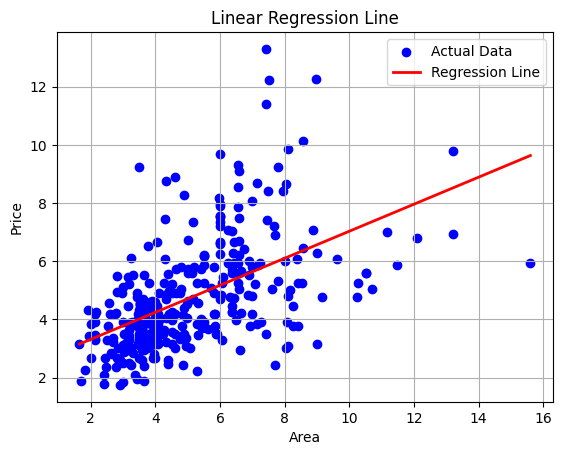

In [11]:
x_line = np.linspace(train_df['area'].min(), train_df['area'].max(), 100)  
y_line = w * x_line + b 

plt.scatter(train_df['area'], train_df['price'], color="blue", label="Actual Data")

plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression Line")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression Line")
plt.legend()
plt.grid()

plt.show()

In [12]:
# Comparing my model with sklearn model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_df["area"].to_numpy().reshape(-1, 1), train_df["price"].to_numpy().reshape(-1, 1))
w_sk = model.coef_[0][0] 
b_sk = model.intercept_[0]

In [13]:
w_sk, b_sk

(0.4645098999004791, 2.3885338516575274)

In [14]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(test_df['area'].to_numpy().reshape(-1, 1))

mse = mean_squared_error(test_df['price'].to_numpy().reshape(-1, 1), y_pred)
print(f"MSE: {mse:.4f}")

MSE: 2.3837


Linear Regression with more than 1 feature

In [15]:
EPOCHS_NUM = 10000
ALPHA = 0.00001
m = train_df.shape[0]
w_1, w_2, b = 0, 0, 0

cost_records = []
w_1_records = []
w_2_records = []
b_records = []

for epoch in range(EPOCHS_NUM):
    dw_1 ,dw_2 , db = 0, 0, 0
    w_1_records.append(w_1)
    w_2_records.append(w_2)
    b_records.append(b)
    for sample in train_df.itertuples(index=False):    
        x_1 = sample.area
        x_2 = sample.bedrooms
        y = sample.price
        y_hat = w_1*x + w_2 * x_2 + b
        dw_1 += x_1 * (y_hat - y)
        dw_2 += x_2 * (y_hat - y)
        db += (y_hat - y)

    # Gradient Dcsent
    dw_1 /= m
    dw_2 /= m
    db /= m
    w_1 = w_1 - ALPHA * dw_1
    w_2 = w_2 - ALPHA * dw_2
    b = b - ALPHA * db
    J = sum(((w_1 * sample.area + w_2 * sample.bedrooms + b) - sample.price) ** 2 for sample in train_df.itertuples(index=False)) / m
    J = round(float(J), 20)
    cost_records.append(J)
    if epoch % 2000 == 0:
        print("-------------------------------------------------")
        print(f"Current w_1, w_2 and b {round(w_1, 5),round(w_2, 2), round(b, 5)}")
        print(f'Error in epoch {epoch} = {J}')



-------------------------------------------------
Current w_1, w_2 and b (0.00026, 0.0, 5e-05)
Error in epoch 0 = 26.06990990356118
-------------------------------------------------
Current w_1, w_2 and b (0.37625, 0.2, 0.0657)
Error in epoch 2000 = 7.09435792356644
-------------------------------------------------
Current w_1, w_2 and b (0.56312, 0.3, 0.09417)
Error in epoch 4000 = 3.2168089495329757
-------------------------------------------------
Current w_1, w_2 and b (0.65836, 0.33, 0.10461)
Error in epoch 6000 = 2.6007615720141284
-------------------------------------------------
Current w_1, w_2 and b (0.70919, 0.35, 0.10632)
Error in epoch 8000 = 2.6124218373580184


In [16]:
# Cost function on the test set
J = sum(((w_1 * train_df.area + w_2 * train_df.bedrooms + b) - train_df.price) ** 2) / m
J = round(float(J), 20)
print("Cost Function on Train set (MSE) : ", J)


Cost Function on Train set (MSE) :  2.7041263252507886


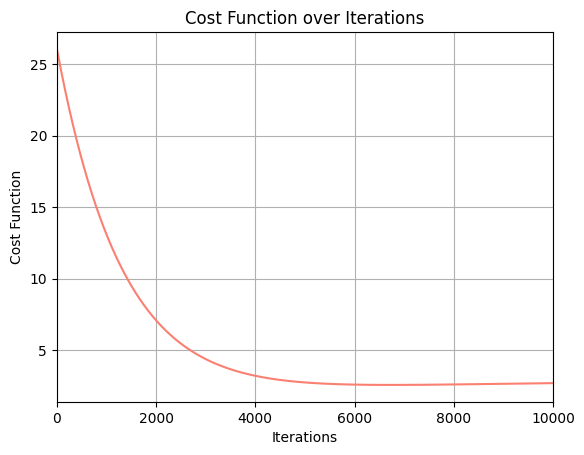

In [17]:
iterations = list(range(1, len(cost_records) + 1))
plt.plot(range(EPOCHS_NUM), cost_records, linestyle='-', color="salmon")

plt.xlim(0, EPOCHS_NUM)
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function over Iterations")
plt.grid(True)

In [18]:
# Cost function on the test set
J = sum(((w_1 * test_df.area + w_2 * test_df.bedrooms + b) - test_df.price) ** 2) / m
J = round(float(J), 20)
print("Cost Function on Test set (MSE) : ", J)


Cost Function on Test set (MSE) :  1.820941102175233


In [19]:
# Comparing my model with sklearn model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train_df[["area", 'bedrooms']].to_numpy(), train_df["price"].to_numpy().reshape(-1, 1))

y_pred = model.predict(test_df[['area', 'bedrooms']].to_numpy())

mse = mean_squared_error(test_df['price'].to_numpy().reshape(-1, 1), y_pred)
print(f"MSE: {mse:.4f}")

MSE: 2.2349


In [20]:
print
model.coef_

array([[0.44292356, 0.8368205 ]])